In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
personas = pd.read_csv('..\Data\BNK_FCT_PERSONA.csv', sep = ";")

C:\Users\marti\AppData\Local\Temp\ipykernel_19792\1051574019.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  personas = pd.read_csv('..\Data\BNK_FCT_PERSONA.csv', sep = ";")


In [4]:
personas.head()

,ID_CLIENTE,FECHA_ULT_RENTA,RENTA,EDAD,FLAG_FALLECIDO,ID_GENERO,FLAG_RESIDE,FLAG_EXTRANJERO,ID_TIPO_DOMICILIO,ID_REGION_RESIDE,ID_PAIS_RESIDE,FECHA_NACIMIENTO,FECHA_FALLECIMIENTO,NOMBRE,APELLIDO1,APELLIDO2,NUM_RUT,DV_RUT,FECHA_DATO,FECHA_PROCESO
0,999,NaN,20943.00,70.0,N,M,S,N,1.0,28.0,CL,1946-05-02,1900-01-01,Alonso Gonzalo,Beltrán,Peña,100000998,5,2016-05-28,2016-05-27 22:50:38
1,1000,NaN,25682.00,42.0,N,M,S,N,1.0,28.0,CL,1974-05-23,1900-01-01,Jorge Mauricio,Troncoso,Román,100000999,3,2016-05-28,2016-05-27 22:50:38
2,1001,NaN,192363.54,77.0,N,M,S,N,1.0,28.0,CL,1939-05-15,1900-01-01,Rodrigo Jaime,Azócar,Catalán,100001000,2,2016-05-28,2016-05-27 22:50:38
3,1002,NaN,409333.94,80.0,N,M,S,N,1.0,28.0,CL,1936-05-24,1900-01-01,José Carlos,Vásquez,González,100001001,0,2016-05-28,2016-05-27 22:50:38
4,1003,NaN,108726.71,36.0,N,M,S,N,1.0,28.0,CL,1980-05-14,1900-01-01,Miguel Jorge,Miranda,Marín,100001002,9,2016-05-28,2016-05-27 22:50:38


In [5]:
personas["FLAG_EXTRANJERO"] = personas["FLAG_EXTRANJERO"].replace({"N": 0, "S": 1})
personas["FLAG_RESIDE"] = personas["FLAG_RESIDE"].replace({"N": 0, "S": 1})
personas["ID_GENERO"] = personas["ID_GENERO"].replace({"M": 0, "F": 1})
personas.head()

,ID_CLIENTE,FECHA_ULT_RENTA,RENTA,EDAD,FLAG_FALLECIDO,ID_GENERO,FLAG_RESIDE,FLAG_EXTRANJERO,ID_TIPO_DOMICILIO,ID_REGION_RESIDE,ID_PAIS_RESIDE,FECHA_NACIMIENTO,FECHA_FALLECIMIENTO,NOMBRE,APELLIDO1,APELLIDO2,NUM_RUT,DV_RUT,FECHA_DATO,FECHA_PROCESO
0,999,NaN,20943.00,70.0,N,0.0,1.0,0.0,1.0,28.0,CL,1946-05-02,1900-01-01,Alonso Gonzalo,Beltrán,Peña,100000998,5,2016-05-28,2016-05-27 22:50:38
1,1000,NaN,25682.00,42.0,N,0.0,1.0,0.0,1.0,28.0,CL,1974-05-23,1900-01-01,Jorge Mauricio,Troncoso,Román,100000999,3,2016-05-28,2016-05-27 22:50:38
2,1001,NaN,192363.54,77.0,N,0.0,1.0,0.0,1.0,28.0,CL,1939-05-15,1900-01-01,Rodrigo Jaime,Azócar,Catalán,100001000,2,2016-05-28,2016-05-27 22:50:38
3,1002,NaN,409333.94,80.0,N,0.0,1.0,0.0,1.0,28.0,CL,1936-05-24,1900-01-01,José Carlos,Vásquez,González,100001001,0,2016-05-28,2016-05-27 22:50:38
4,1003,NaN,108726.71,36.0,N,0.0,1.0,0.0,1.0,28.0,CL,1980-05-14,1900-01-01,Miguel Jorge,Miranda,Marín,100001002,9,2016-05-28,2016-05-27 22:50:38


In [6]:
personas_datos_importantes = personas[["ID_CLIENTE", "RENTA", "EDAD", "ID_GENERO", "FLAG_RESIDE", "FLAG_EXTRANJERO", "ID_REGION_RESIDE", "FECHA_DATO"]]
personas_datos_importantes.head()

,ID_CLIENTE,RENTA,EDAD,ID_GENERO,FLAG_RESIDE,FLAG_EXTRANJERO,ID_REGION_RESIDE,FECHA_DATO
0,999,20943.00,70.0,0.0,1.0,0.0,28.0,2016-05-28
1,1000,25682.00,42.0,0.0,1.0,0.0,28.0,2016-05-28
2,1001,192363.54,77.0,0.0,1.0,0.0,28.0,2016-05-28
3,1002,409333.94,80.0,0.0,1.0,0.0,28.0,2016-05-28
4,1003,108726.71,36.0,0.0,1.0,0.0,28.0,2016-05-28


In [7]:
personas_datos_importantes.loc[personas_datos_importantes['ID_REGION_RESIDE'] == 28, 'ID_REGION_RESIDE'] = 1
personas_datos_importantes.loc[personas_datos_importantes['ID_REGION_RESIDE'] < 28, 'ID_REGION_RESIDE'] = 1
personas_datos_importantes.loc[personas_datos_importantes['ID_REGION_RESIDE'] > 28, 'ID_REGION_RESIDE'] = 1
personas_datos_importantes.head()

,ID_CLIENTE,RENTA,EDAD,ID_GENERO,FLAG_RESIDE,FLAG_EXTRANJERO,ID_REGION_RESIDE,FECHA_DATO
0,999,20943.00,70.0,0.0,1.0,0.0,1.0,2016-05-28
1,1000,25682.00,42.0,0.0,1.0,0.0,1.0,2016-05-28
2,1001,192363.54,77.0,0.0,1.0,0.0,1.0,2016-05-28
3,1002,409333.94,80.0,0.0,1.0,0.0,1.0,2016-05-28
4,1003,108726.71,36.0,0.0,1.0,0.0,1.0,2016-05-28


In [8]:
tabla_final = pd.read_csv('..\Tabla_final_colab.csv', sep = ",")

# Convertir la columna 'fecha_hora' al formato datetime
tabla_final['fecha_hora'] = pd.to_datetime(tabla_final['FECHA_DATO'])

# Extraer solo la fecha
tabla_final['FECHA_DATO'] = tabla_final['fecha_hora'].dt.strftime('%Y-%m-%d')

tabla_final.head()

,CT_CTE,DEBITO_DIR,FECHA_DATO,ID_EMPLEADO,ID_SEGMENTO_VALOR,ANTIGUEDAD,ID_CLIENTE,RENTA,EDAD,EDAD_PUNTAJE,ID_GENERO,FLAG_PREAP,ID_PROD,FECHA_PROCESO,ACEPTADO,fecha_hora
0,1.0,0.0,2015-01-28,0.0,2.0,6.0,1375586.0,87218.10,36.0,3.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0,2015-01-28
1,1.0,0.0,2015-01-28,0.0,1.0,35.0,1050612.0,122179.11,23.0,1.0,0.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0,2015-01-28
2,0.0,0.0,2015-01-28,0.0,1.0,35.0,1050613.0,119775.54,23.0,1.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0,2015-01-28
3,1.0,0.0,2015-01-28,0.0,1.0,35.0,1050615.0,22220.04,24.0,1.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0,2015-01-28
4,1.0,0.0,2015-01-28,0.0,1.0,35.0,1050616.0,295590.36,24.0,1.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0,2015-01-28


In [9]:
tabla_final_id_fe_ac = tabla_final[["FECHA_DATO", "ID_CLIENTE", "ACEPTADO"]]
tabla_final_id_fe_ac

,FECHA_DATO,ID_CLIENTE,ACEPTADO
0,2015-01-28,1375586.0,0.0
1,2015-01-28,1050612.0,0.0
2,2015-01-28,1050613.0,0.0
3,2015-01-28,1050615.0,0.0
4,2015-01-28,1050616.0,0.0
...,...,...,...
602555,2016-02-28,899549.0,0.0
602556,2016-03-28,1441442.0,0.0
602557,2016-03-28,1454431.0,0.0
602558,2016-03-28,56812.0,0.0


In [10]:
personas_importante_aprobados = pd.merge(tabla_final_id_fe_ac, personas_datos_importantes, on = ['ID_CLIENTE'], how='left')
personas_importante_aprobados = personas_importante_aprobados.drop_duplicates()
personas_importante_aprobados

,FECHA_DATO_x,ID_CLIENTE,ACEPTADO,RENTA,EDAD,ID_GENERO,FLAG_RESIDE,FLAG_EXTRANJERO,ID_REGION_RESIDE,FECHA_DATO_y
0,2015-01-28,1375586.0,0.0,87218.10,36.0,1.0,1.0,0.0,1.0,2016-05-28
1,2015-01-28,1050612.0,0.0,122179.11,23.0,0.0,1.0,0.0,1.0,2016-05-28
2,2015-01-28,1050613.0,0.0,119775.54,23.0,1.0,1.0,0.0,1.0,2016-05-28
3,2015-01-28,1050615.0,0.0,22220.04,24.0,1.0,1.0,0.0,1.0,2016-05-28
4,2015-01-28,1050616.0,0.0,295590.36,24.0,1.0,1.0,0.0,1.0,2016-05-28
...,...,...,...,...,...,...,...,...,...,...
602555,2016-02-28,899549.0,0.0,97397.16,41.0,1.0,1.0,0.0,1.0,2016-05-28
602556,2016-03-28,1441442.0,0.0,168445.62,34.0,0.0,1.0,0.0,1.0,2016-05-28
602557,2016-03-28,1454431.0,0.0,53689.02,24.0,1.0,1.0,0.0,1.0,2016-05-28
602558,2016-03-28,56812.0,0.0,64404.21,61.0,0.0,1.0,0.0,1.0,2016-05-28


In [11]:
personas_importante_aprobados["ID_REGION_RESIDE"].sum()

602524.0

<Axes: >

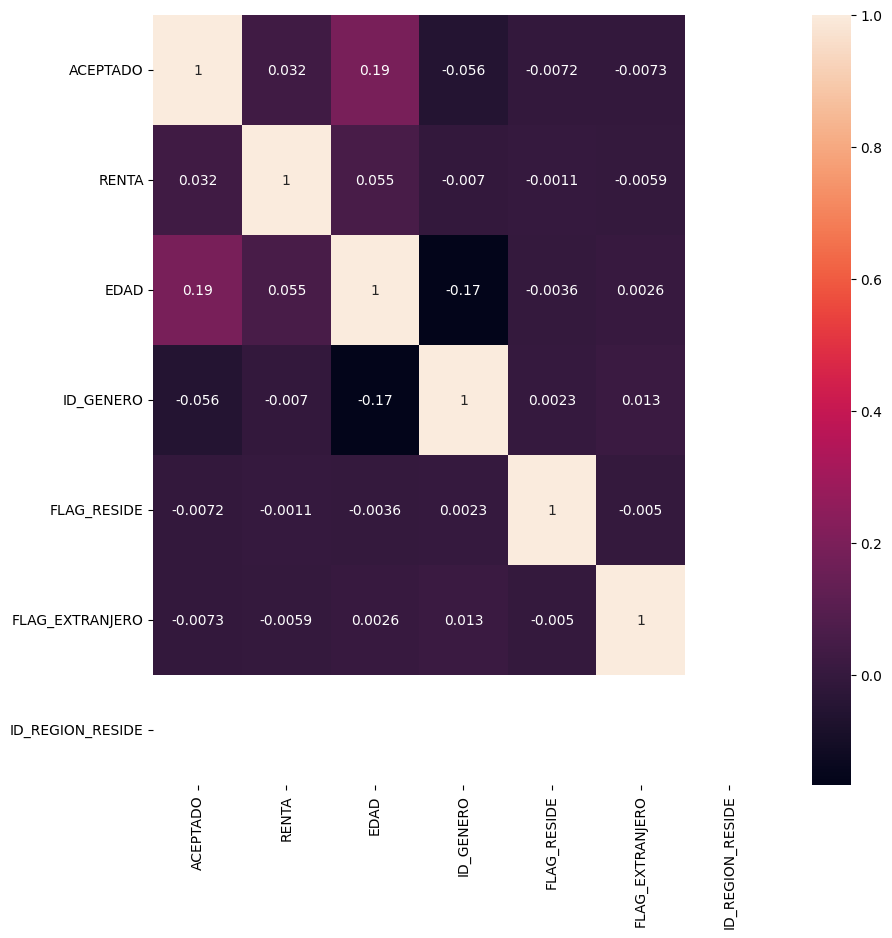

In [12]:
tenencia_total_aceptaron = personas_importante_aprobados[["ACEPTADO", "RENTA", "EDAD", "ID_GENERO", "FLAG_RESIDE", "FLAG_EXTRANJERO", "ID_REGION_RESIDE"]]
corr = tenencia_total_aceptaron.corr().values
plt.figure(figsize = (10,10))
correlation_matrix = tenencia_total_aceptaron.corr()
sns.heatmap(data = correlation_matrix, annot = True)

In [14]:
info_personas = personas_importante_aprobados[["ID_CLIENTE", "ACEPTADO", "RENTA", "EDAD", "ID_GENERO"]]
info_personas

,ID_CLIENTE,ACEPTADO,RENTA,EDAD,ID_GENERO
0,1375586.0,0.0,87218.10,36.0,1.0
1,1050612.0,0.0,122179.11,23.0,0.0
2,1050613.0,0.0,119775.54,23.0,1.0
3,1050615.0,0.0,22220.04,24.0,1.0
4,1050616.0,0.0,295590.36,24.0,1.0
...,...,...,...,...,...
602555,899549.0,0.0,97397.16,41.0,1.0
602556,1441442.0,0.0,168445.62,34.0,0.0
602557,1454431.0,0.0,53689.02,24.0,1.0
602558,56812.0,0.0,64404.21,61.0,0.0


In [ ]:
info_personas.to_csv(r'info_personas.csv', index=False, header=True)